# BlaBlaCar - Analysis

## a)	Importing & Cleaning Data:

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

In [3]:
#Import BlaBlaCar.xlsx
df = pd.read_excel('BlaBla-Car_Data.xlsx')
df.head()

,driver_id,offer_id,departure,arrival,trip_distance,offer_date,departure_date,price,nb_offers,photo,...,min_price_depd,mean_price_depd,sd_price_depd,seats_in_car,seat_sold,Driver_first_name,Satisfaction_Livel,nb_evaluation,driver_age,driver_gender
0,123956,427719,Lyon,Paris,425.0,5-Jan-14,1/12/2014 17:30,28,526.0,0,...,20,29.071247,2.567809,4,0,Francois,Excellent,0,25,0
1,81617,280534,Lyon,Paris,429.0,2-Jan-14,1/6/2014 14:40,30,526.0,0,...,20,28.862133,3.189145,0,0,Corinne,Good,24,31,1
2,198167,657605,Lyon,Paris,429.0,2-Jan-14,1/6/2014 15:10,31,526.0,1,...,20,28.862133,3.189145,0,0,Laura,Excellent,1,31,1
3,282817,946022,Lyon,Paris,429.0,2-Jan-14,1/6/2014 15:30,25,526.0,1,...,20,28.862133,3.189145,3,3,Philippe,VeryGood,3,31,0
4,29640,94886,Lyon,Paris,435.0,5-Jan-14,1/19/2014 9:00,25,526.0,1,...,18,29.364803,2.784098,7,4,Antoine,VeryGood,10,26,0


In [4]:
# Write a Python code to display a summary of the basic information about the Data Frame and its data. Please indicate any information you consider relevant to data analysis. (Data-frame Information, Data types, Shape, etc …)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97625 entries, 0 to 97624
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   driver_id           97625 non-null  int64  
 1   offer_id            97625 non-null  int64  
 2   departure           97625 non-null  object 
 3   arrival             97625 non-null  object 
 4   trip_distance       97601 non-null  float64
 5   offer_date          97625 non-null  object 
 6   departure_date      97625 non-null  object 
 7   price               97625 non-null  int64  
 8   nb_offers           97603 non-null  float64
 9   photo               97625 non-null  int64  
 10  driver_status       97625 non-null  object 
 11  music               97625 non-null  int64  
 12  talk                97625 non-null  int64  
 13  pet                 97625 non-null  int64  
 14  smoking             97625 non-null  int64  
 15  manual_reservation  97625 non-null  int64  
 16  roun

In [5]:
df.describe()

,driver_id,offer_id,trip_distance,price,nb_offers,photo,music,talk,pet,smoking,...,page_view,max_price_depd,min_price_depd,mean_price_depd,sd_price_depd,seats_in_car,seat_sold,nb_evaluation,driver_age,driver_gender
count,97625.000000,9.762500e+04,97601.000000,97625.000000,97603.000000,97625.000000,97625.000000,97625.0,97625.000000,97625.000000,...,97625.000000,97625.000000,97625.000000,97625.000000,97613.000000,97625.000000,97625.000000,97625.000000,97625.000000,97625.000000
mean,183112.611268,6.122613e+05,467.667012,29.136020,767.564409,0.419001,0.571790,1.0,0.085163,0.058284,...,42.392205,46.891431,17.492353,29.680794,3.299338,2.300026,1.159980,12.207877,34.633147,0.249209
std,104032.508106,3.460801e+05,26.852776,3.538796,51.932390,0.493398,0.494822,0.0,0.279125,0.234281,...,60.043466,18.193730,4.897133,0.679380,0.967332,1.833990,1.539941,22.740628,11.692740,0.432557
min,10.000000,2.000000e+01,312.000000,1.000000,526.000000,0.000000,0.000000,1.0,0.000000,0.000000,...,0.000000,23.000000,-1.000000,21.666666,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,91727.000000,3.207850e+05,462.000000,28.000000,761.000000,0.000000,0.000000,1.0,0.000000,0.000000,...,8.000000,40.000000,15.000000,29.267822,2.752414,0.000000,0.000000,0.000000,26.000000,0.000000
50%,187454.000000,6.151750e+05,462.000000,30.000000,785.000000,0.000000,1.000000,1.0,0.000000,0.000000,...,23.000000,42.000000,20.000000,29.720201,3.079294,3.000000,0.000000,4.000000,31.000000,0.000000
75%,277383.000000,9.169910e+05,469.000000,30.000000,798.000000,1.000000,1.000000,1.0,0.000000,0.000000,...,53.000000,46.000000,20.000000,30.103077,3.506759,4.000000,2.000000,13.000000,42.000000,0.000000
max,354871.000000,1.192932e+06,1700.000000,251.000000,834.000000,1.000000,1.000000,1.0,1.000000,1.000000,...,1199.000000,251.000000,38.000000,38.000000,9.647118,18.000000,15.000000,357.000000,85.000000,1.000000


In [6]:
df.dtypes

driver_id               int64
offer_id                int64
departure              object
arrival                object
trip_distance         float64
offer_date             object
departure_date         object
price                   int64
nb_offers             float64
photo                   int64
driver_status          object
music                   int64
talk                    int64
pet                     int64
smoking                 int64
manual_reservation      int64
round_trip              int64
car_rating              int64
detour_time             int64
page_view               int64
max_price_depd          int64
min_price_depd          int64
mean_price_depd       float64
sd_price_depd         float64
seats_in_car            int64
seat_sold               int64
Driver_first_name      object
Satisfaction_Livel     object
nb_evaluation           int64
driver_age              int64
driver_gender           int64
dtype: object

In [7]:
df.shape

(97625, 31)

### Clean data-frame

In [8]:
df.isnull().sum()

driver_id              0
offer_id               0
departure              0
arrival                0
trip_distance         24
offer_date             0
departure_date         0
price                  0
nb_offers             22
photo                  0
driver_status          0
music                  0
talk                   0
pet                    0
smoking                0
manual_reservation     0
round_trip             0
car_rating             0
detour_time            0
page_view              0
max_price_depd         0
min_price_depd         0
mean_price_depd        0
sd_price_depd         12
seats_in_car           0
seat_sold              0
Driver_first_name      0
Satisfaction_Livel     5
nb_evaluation          0
driver_age             0
driver_gender          0
dtype: int64

In [9]:
df.select_dtypes(include = "object").columns 

Index(['departure', 'arrival', 'offer_date', 'departure_date', 'driver_status',
       'Driver_first_name', 'Satisfaction_Livel'],
      dtype='object')

In [10]:
# Categorical variables: Replace by the Mode: Calculates the column mode and uses the mode value as the replacement value for each missing value in the column.
for col in df.select_dtypes(include = "object").columns :
    df[col] = df[col].fillna(df[col].mode().iloc[0])

In [11]:
df.isnull().sum()

driver_id              0
offer_id               0
departure              0
arrival                0
trip_distance         24
offer_date             0
departure_date         0
price                  0
nb_offers             22
photo                  0
driver_status          0
music                  0
talk                   0
pet                    0
smoking                0
manual_reservation     0
round_trip             0
car_rating             0
detour_time            0
page_view              0
max_price_depd         0
min_price_depd         0
mean_price_depd        0
sd_price_depd         12
seats_in_car           0
seat_sold              0
Driver_first_name      0
Satisfaction_Livel     0
nb_evaluation          0
driver_age             0
driver_gender          0
dtype: int64

In [12]:
# 	Quantitative variables: Replace the missing data by the Mean by “driver_status”: Calculate the Mean by “driver_status “ and use it as the replacement value for each missing value in the column.
for col in df.select_dtypes(include=["float", "int"]).columns :
    for s in df["driver_status"].unique():
        dfs = df.loc[(df['driver_status'] ==s)]
        df.loc[(df['driver_status'] == s) & (df[col].isnull()), col]= dfs[col].mean()

In [13]:
df.isnull().sum()

driver_id             0
offer_id              0
departure             0
arrival               0
trip_distance         0
offer_date            0
departure_date        0
price                 0
nb_offers             0
photo                 0
driver_status         0
music                 0
talk                  0
pet                   0
smoking               0
manual_reservation    0
round_trip            0
car_rating            0
detour_time           0
page_view             0
max_price_depd        0
min_price_depd        0
mean_price_depd       0
sd_price_depd         0
seats_in_car          0
seat_sold             0
Driver_first_name     0
Satisfaction_Livel    0
nb_evaluation         0
driver_age            0
driver_gender         0
dtype: int64

## b) Data Manipulation

In [14]:
# Find & Print the Maximum   " trip_distance"   Driver name

df_max_dist = df[df["trip_distance"] == df["trip_distance"].max()][["Driver_first_name", "trip_distance"]]
df_max_dist

,Driver_first_name,trip_distance
94822,Claude,1700.0


In [15]:
# Using the loop(for ...  in ... ) to : Select and print by ‘‘driver_status’’,
# the Driver_name with the max “"detour_time"
for driver_status in df['driver_status'].unique():
    subset_df = df[df['driver_status'] == driver_status]
    max_detour_row = subset_df.loc[subset_df['detour_time'].idxmax()]
    print(f"For driver_status '{driver_status}', the Driver name with max detour time is: {max_detour_row['Driver_first_name']} (detour_time: {max_detour_row['detour_time']})")

For driver_status 'S2', the Driver name with max detour time is: Julien (detour_time: 30.0)
For driver_status 'S5', the Driver name with max detour time is: Jean-Baptiste (detour_time: 30.0)
For driver_status 'S3', the Driver name with max detour time is: Armand (detour_time: 30.0)
For driver_status 'S4', the Driver name with max detour time is: Mustapha (detour_time: 30.0)
For driver_status 'S1', the Driver name with max detour time is: Marcel (detour_time: 30.0)


In [16]:
# Using the loop(for ...  in ... ) to : Select and print by ‘‘driver_status’’, the Driver_name with the max “"detour_time"

driver_status_list = df['driver_status'].unique()
for status in driver_status_list:
    tmpdf = df.loc[df['driver_status']==status,]
    agg_functions = {'Driver_first_name': 'first', 'driver_status': 'first','detour_time':'sum'}
    tmpdf_sum = tmpdf.groupby('driver_id')[['Driver_first_name','driver_status','detour_time']].agg(agg_functions)
    tmpdf_sum_sorted = tmpdf_sum.sort_values('detour_time',ascending=False)
    print(f'driver_status:{tmpdf_sum_sorted.iloc[0,1]}')
    print(f'driver_name:{tmpdf_sum_sorted.iloc[0,0]}')
    print(f'detour_time:{tmpdf_sum_sorted.iloc[0,2]}')
    print("***********************************************")

driver_status:S2
driver_name:Romain
detour_time:315.0
***********************************************
driver_status:S5
driver_name:Philippe
detour_time:360.0
***********************************************
driver_status:S3
driver_name:Gilles
detour_time:330.0
***********************************************
driver_status:S4
driver_name:Fabien
detour_time:615.0
***********************************************
driver_status:S1
driver_name:Chris
detour_time:330.0
***********************************************


In [17]:
df.columns

Index(['driver_id', 'offer_id', 'departure', 'arrival', 'trip_distance',
       'offer_date', 'departure_date', 'price', 'nb_offers', 'photo',
       'driver_status', 'music', 'talk', 'pet', 'smoking',
       'manual_reservation', 'round_trip', 'car_rating', 'detour_time',
       'page_view', 'max_price_depd', 'min_price_depd', 'mean_price_depd',
       'sd_price_depd', 'seats_in_car', 'seat_sold', 'Driver_first_name',
       'Satisfaction_Livel', 'nb_evaluation', 'driver_age', 'driver_gender'],
      dtype='object')

In [18]:
for s in df.driver_status.unique().tolist():
    print(s)
    print("=======================")
    dfs = df[df['driver_status'] == s]
    max_D = dfs['detour_time'].max()
    print("max detour ", max_D)
    print(dfs[['driver_id', 'Driver_first_name']])
    print("*************************************")

S2
max detour  30.0
       driver_id Driver_first_name
0       123956.0          Francois
2       198167.0             Laura
6       293442.0              Remi
7       328307.0           Thibaud
9        17478.0            Amelie
...          ...               ...
97601   244021.0            Maxime
97603    17179.0            Amelie
97607   348922.0           Yannick
97612   320053.0          Stephane
97620   315770.0           Solange

[17408 rows x 2 columns]
*************************************
S5
max detour  30.0
       driver_id Driver_first_name
1        81617.0           Corinne
15       24939.0              Anne
17       87615.0             David
20      141096.0         Guillaume
28      188223.0            Julien
...          ...               ...
97589   329241.0          Thibault
97593   152136.0         Hyacinthe
97594   176765.0           Jessica
97611   282245.0          Philippe
97618   248620.0             Mhand

[17160 rows x 2 columns]
******************************

In [19]:
df.columns 

Index(['driver_id', 'offer_id', 'departure', 'arrival', 'trip_distance',
       'offer_date', 'departure_date', 'price', 'nb_offers', 'photo',
       'driver_status', 'music', 'talk', 'pet', 'smoking',
       'manual_reservation', 'round_trip', 'car_rating', 'detour_time',
       'page_view', 'max_price_depd', 'min_price_depd', 'mean_price_depd',
       'sd_price_depd', 'seats_in_car', 'seat_sold', 'Driver_first_name',
       'Satisfaction_Livel', 'nb_evaluation', 'driver_age', 'driver_gender'],
      dtype='object')

In [20]:
# Using your function, print the return if the “driver_id” = (from 282460 to 242870)

range_start = 242870
range_end = 282460

# Use loc to select rows within the specified range
selected_rows = df.loc[(df['driver_id'] >= range_start) & (df['driver_id'] <= range_end)]
selected_columns = ['driver_id', 'Driver_first_name', 'trip_distance', 'driver_age', 'price']


# Display the selected rows
print(f"Selected rows in the specified range ({range_start} to {range_end}):")
print('=======================================================')
selected_rows[selected_columns]

Selected rows in the specified range (242870 to 282460):


,driver_id,Driver_first_name,trip_distance,driver_age,price
12,259106.0,N,449.0,27.0,26.0
13,275904.0,Patouani,449.0,27.0,24.0
22,253409.0,Mohamed,450.0,31.0,25.0
23,253409.0,Mohamed,450.0,31.0,25.0
29,278458.0,Paul,457.0,23.0,28.0
...,...,...,...,...,...
97605,250081.0,Michel,483.0,23.0,28.0
97611,282245.0,Philippe,486.0,26.0,30.0
97613,274937.0,Pascal,491.0,48.0,29.0
97618,248620.0,Mhand,506.0,49.0,29.0


In [20]:
# Using your function, print the return if the “driver_id” = (from 282460 to 242870)

def search_by_driver_id(driver_id_list:list) -> list:
    
    driver_first_name_info = []
    for driver_id in range(driver_id_list[0],driver_id_list[1]+1): 
        df_tmp = df[df['driver_id']==driver_id]
        if df_tmp.empty:
            continue
        driver_first_name = df_tmp['Driver_first_name'].iloc[0]
        driver_age = df_tmp['driver_age'].iloc[0]
        avg_trip_distance = df_tmp['trip_distance'].mean()
        avg_price = df_tmp['price'].mean()
        driver_first_name_info.append([driver_id,driver_first_name,driver_age,avg_trip_distance,avg_price])
    return driver_first_name_info

In [21]:
# Using your function, print the return if the “driver_id” = (from 282460 to 242870)

result = search_by_driver_id([242870,282460])
result = pd.DataFrame(result,columns=['driver_id','driver_first_name','driver_age','avg_trip_distance','avg_price'])
result

,driver_id,driver_first_name,driver_age,avg_trip_distance,avg_price
0,242878,Maurice,29.0,487.0,21.0
1,242879,Maurice,32.0,465.0,21.0
2,242880,Maurice,33.0,462.0,21.0
3,242882,Maurice,48.0,462.0,21.0
4,242884,Maurice,59.0,434.0,23.5
...,...,...,...,...,...
6874,282451,Philippe,30.0,462.0,35.0
6875,282453,Philippe,32.0,477.5,31.0
6876,282454,Philippe,33.0,467.0,30.5
6877,282459,Philippe,38.0,464.0,30.0


# Data Visualization & Data Analysis

# Data Visualization

In [22]:
df.groupby('Satisfaction_Livel')[['min_price_depd', 'max_price_depd']].mean().reset_index()

,Satisfaction_Livel,min_price_depd,max_price_depd
0,Average,17.463388,47.266815
1,Excellent,17.462419,46.790371
2,Good,17.534358,46.800539
3,Poor,17.386978,46.447501
4,VeryGood,17.503618,46.844440


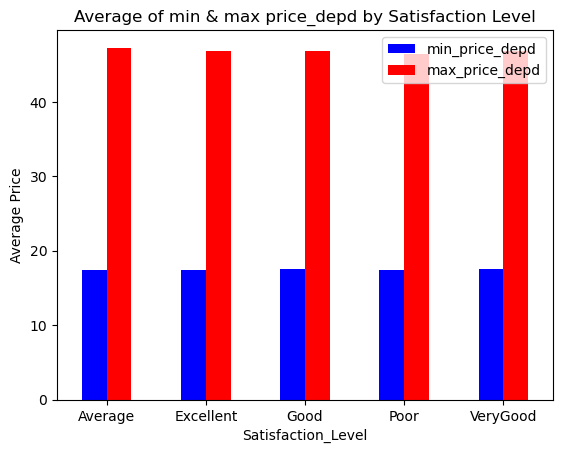

In [23]:
# The Bar chart  of the average of (min_price_depd  &  max_price_depd) by ‘Satisfaction_Livel’

average_prices = df.groupby('Satisfaction_Livel')[['min_price_depd', 'max_price_depd']].mean()
average_prices.plot(kind='bar', color = ['blue','red'],rot=0)

plt.title('Average of min & max price_depd by Satisfaction Level')
plt.xlabel('Satisfaction_Level')
plt.ylabel('Average Price')
plt.show()

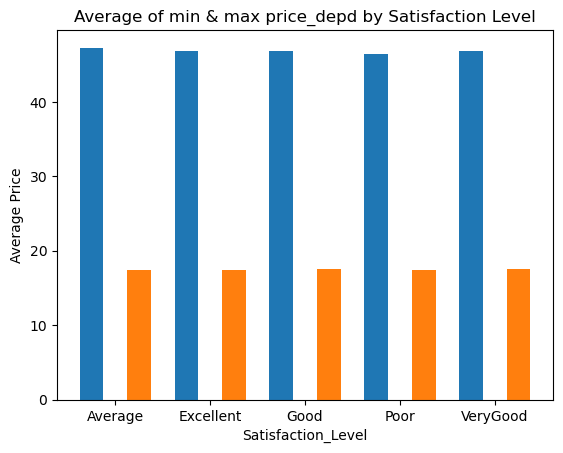

In [24]:
# The Bar chart  of the average of (min_price_depd  &  max_price_depd) by ‘Satisfaction_Livel’
max = df.groupby('Satisfaction_Livel')['max_price_depd'].mean()
min = df.groupby('Satisfaction_Livel')['min_price_depd'].mean()
plt.bar([i[0]-0.25 for i in enumerate(max.index)],max,0.25)
plt.bar([i[0]+0.25 for i in enumerate(max.index)],min,0.25)
plt.xticks(np.arange(len(max.index)),max.index.tolist())

plt.title('Average of min & max price_depd by Satisfaction Level')
plt.xlabel('Satisfaction_Level')
plt.ylabel('Average Price')
plt.show()

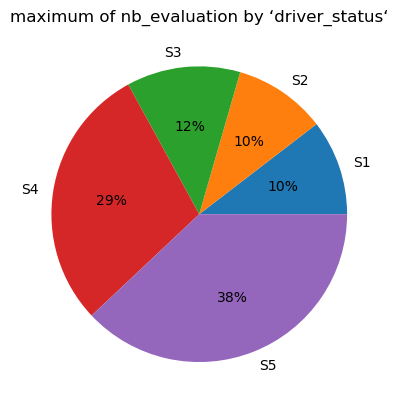

In [25]:
# Read the maximum of 'nb_evaluation' by ‘driver_status‘ and show it using a Pie chart
pie_data = df.groupby('driver_status')[['driver_status','nb_evaluation']].max()
plt.pie(labels = pie_data.iloc[:,0].tolist(),x = pie_data.iloc[:,1].tolist(),autopct='%1.0f%%')
plt.title('maximum of nb_evaluation by ‘driver_status‘')
plt.show()

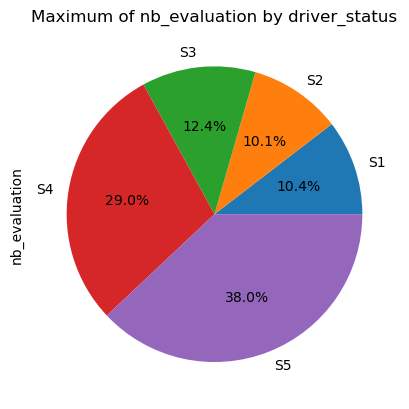

In [26]:
# Read the maximum of 'nb_evaluation' by ‘driver_status‘ and show it using a Pie chart

max_nb_evaluation = df.groupby('driver_status')['nb_evaluation'].max()
max_nb_evaluation.plot(kind='pie', autopct='%1.1f%%')
plt.title('Maximum of nb_evaluation by driver_status')

plt.show()

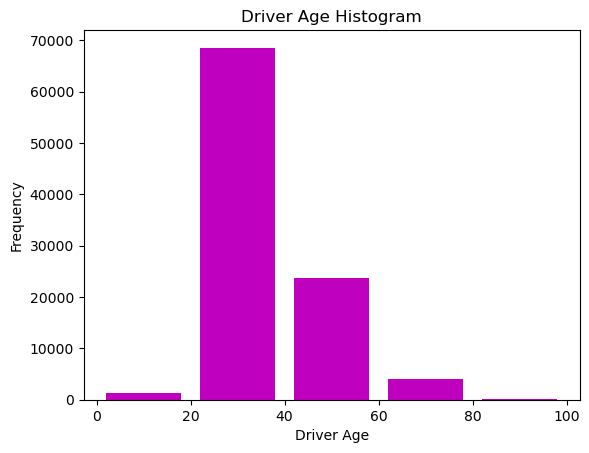

In [27]:
# Read the “driver_age ” of each driver and show it using the histogram to see five ‘driver-age ranges (0-20, 21-40, 41-60, 61-80, 81-100)

df['driver_age'].plot(kind='hist', bins=[0, 20, 40, 60, 80, 100], color = 'm', rwidth=0.8)
plt.title('Driver Age Histogram')
plt.xlabel('Driver Age')
plt.ylabel('Frequency')
plt.show()

# Data Analysis
The manager data scientist of BlaBlaCar asks you to publish:
 the Top Five BlaBlaCar_Index  driver with ( Driver_id,  Driver_first_name,   
                                            driver_status,  Business_Index, Confort_Index  ) 

( BlaBlaCar_Index) per Driver_id =   { ( Business_Index )   /   (1+ Confort_Index) } per Driver_id

In [28]:
# Business_Index Value: Total (trip Distance * mean_price_depd) per Driver_id
df['Business_Index'] = df['trip_distance'] * df['mean_price_depd']

In [29]:
# Confort_Index Value = Total (3 + car_rating + detour_time + music - smoking) per Driver_id
df['Confort_Index'] = 3 + df['car_rating'] + df['detour_time'] + df['music'] - df['smoking']

In [30]:
# BlaBlaCar Index: {(Business_Index) / (1+ Confort_Index)} per Driver_id
df['BlaBlaCar_Index'] = df['Business_Index'] / (1 + df['Confort_Index'])

In [31]:
df

,driver_id,offer_id,departure,arrival,trip_distance,offer_date,departure_date,price,nb_offers,photo,...,seats_in_car,seat_sold,Driver_first_name,Satisfaction_Livel,nb_evaluation,driver_age,driver_gender,Business_Index,Confort_Index,BlaBlaCar_Index
0,123956.0,427719.0,Lyon,Paris,425.0,5-Jan-14,1/12/2014 17:30,28.0,526.0,0.0,...,4.0,0.0,Francois,Excellent,0.0,25.0,0.0,12355.279975,21.0,561.603635
1,81617.0,280534.0,Lyon,Paris,429.0,2-Jan-14,1/6/2014 14:40,30.0,526.0,0.0,...,0.0,0.0,Corinne,Good,24.0,31.0,1.0,12381.855057,21.0,562.811594
2,198167.0,657605.0,Lyon,Paris,429.0,2-Jan-14,1/6/2014 15:10,31.0,526.0,1.0,...,0.0,0.0,Laura,Excellent,1.0,31.0,1.0,12381.855057,21.0,562.811594
3,282817.0,946022.0,Lyon,Paris,429.0,2-Jan-14,1/6/2014 15:30,25.0,526.0,1.0,...,3.0,3.0,Philippe,VeryGood,3.0,31.0,0.0,12381.855057,23.0,515.910627
4,29640.0,94886.0,Lyon,Paris,435.0,5-Jan-14,1/19/2014 9:00,25.0,526.0,1.0,...,7.0,4.0,Antoine,VeryGood,10.0,26.0,0.0,12773.689305,7.0,1596.711163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97620,315770.0,1055947.0,Lyon,Paris,506.0,5-Mar-14,3/14/2014 14:30,28.0,834.0,1.0,...,0.0,0.0,Solange,Good,2.0,49.0,1.0,15148.761078,20.0,721.369575
97621,324044.0,1089104.0,Lyon,Paris,506.0,13-Mar-14,3/16/2014 17:45,31.0,834.0,0.0,...,3.0,0.0,Sylvain,Excellent,15.0,44.0,0.0,14931.587396,7.0,1866.448425
97622,175981.0,583045.0,Lyon,Paris,514.0,13-Mar-14,5/4/2014 10:05,37.0,834.0,1.0,...,4.0,2.0,Jerome,Good,5.0,44.0,0.0,15569.916324,21.0,707.723469
97623,123163.0,423113.0,Lyon,Paris,528.0,13-Mar-14,4/13/2014 16:00,28.0,834.0,0.0,...,2.0,0.0,Franck,VeryGood,16.0,27.0,0.0,15538.286016,6.0,2219.755145


In [32]:
df[['driver_id', 'BlaBlaCar_Index']]

,driver_id,BlaBlaCar_Index
0,123956.0,561.603635
1,81617.0,562.811594
2,198167.0,562.811594
3,282817.0,515.910627
4,29640.0,1596.711163
...,...,...
97620,315770.0,721.369575
97621,324044.0,1866.448425
97622,175981.0,707.723469
97623,123163.0,2219.755145


The manager data scientist of BlaBlaCar asks you to publish:
     the Top Five BlaBlaCar_Index  driver with ( Driver_id,  Driver_first_name,  
                    driver_status,  Business_Index, Confort_Index  ) 

In [33]:
# The Top Five BlaBlaCar_Index driver with (Driver_id, Driver_first_name, driver_status, Business_Index, Confort_Index)
BlaBlaCar_index_top5 = pd.pivot_table(df,values=['BlaBlaCar_Index'],
                index=['driver_id', 'Driver_first_name', 'driver_status']).reset_index().sort_values('BlaBlaCar_Index',ascending=False).head(5)
BlaBlaCar_index_top5

,driver_id,Driver_first_name,driver_status,BlaBlaCar_Index
9905,54213.0,Camara,S1,6291.808029
58319,316597.0,Solveig,S1,5668.278317
51006,280513.0,Pedro,S1,5550.417136
56463,306909.0,Sandra,S1,5546.335125
18316,99606.0,Elisabeth,S1,5478.839520


In [34]:
# The Top Five BlaBlaCar_Index driver with (Driver_id, Driver_first_name, driver_status, Business_Index, Confort_Index)

# Machine Learning Algorithm

a) Supervised Machine Learning

a)	Supervised Machine Learning 
	Conduct and Interpret a Logistic Regression  
	 Write the resulting logistic regression equation for model1 below:

Predicted logit [' Recommendation' ]  =    (1 ,0)]  =  [ Yes, or  Non ]  

Independent Variable ( X ) = (‘music’,‘talk’, ‘pet’, ‘smoking’, ‘detour_time') 


In [35]:
# New columns 'recommendation'

df['Recommendation'] = df['Satisfaction_Livel'].map({'Bad':0, 'Average':0, 'Good':1, 'VeryGood':1, 'Excellent':1})
df[['Satisfaction_Livel', 'Recommendation']].head()

,Satisfaction_Livel,Recommendation
0,Excellent,1.0
1,Good,1.0
2,Excellent,1.0
3,VeryGood,1.0
4,VeryGood,1.0


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [37]:
conditions = [df['Satisfaction_Livel'] == 'VeryGood',
            (df['Satisfaction_Livel'] == 'Excellent'),
            df['Satisfaction_Livel'] == 'Good']
values = [1, 1, 1]

df['Recommendation'] = np.select(conditions, values, 0)

df.head()

,driver_id,offer_id,departure,arrival,trip_distance,offer_date,departure_date,price,nb_offers,photo,...,seat_sold,Driver_first_name,Satisfaction_Livel,nb_evaluation,driver_age,driver_gender,Business_Index,Confort_Index,BlaBlaCar_Index,Recommendation
0,123956.0,427719.0,Lyon,Paris,425.0,5-Jan-14,1/12/2014 17:30,28.0,526.0,0.0,...,0.0,Francois,Excellent,0.0,25.0,0.0,12355.279975,21.0,561.603635,1
1,81617.0,280534.0,Lyon,Paris,429.0,2-Jan-14,1/6/2014 14:40,30.0,526.0,0.0,...,0.0,Corinne,Good,24.0,31.0,1.0,12381.855057,21.0,562.811594,1
2,198167.0,657605.0,Lyon,Paris,429.0,2-Jan-14,1/6/2014 15:10,31.0,526.0,1.0,...,0.0,Laura,Excellent,1.0,31.0,1.0,12381.855057,21.0,562.811594,1
3,282817.0,946022.0,Lyon,Paris,429.0,2-Jan-14,1/6/2014 15:30,25.0,526.0,1.0,...,3.0,Philippe,VeryGood,3.0,31.0,0.0,12381.855057,23.0,515.910627,1
4,29640.0,94886.0,Lyon,Paris,435.0,5-Jan-14,1/19/2014 9:00,25.0,526.0,1.0,...,4.0,Antoine,VeryGood,10.0,26.0,0.0,12773.689305,7.0,1596.711163,1


# Machine Learning Algorithm

## Supervised Machine Learning

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

In [39]:
# Preparation of variables of modèle de regression

X = df[['music', 'talk', 'pet', 'smoking', 'detour_time']]
y = df['Recommendation']

# Preparation of splits data of modèle de regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 117)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred))

Accuracy:  0.8044933078393881
Precision:  0.8044933078393881


In [40]:
# fit
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

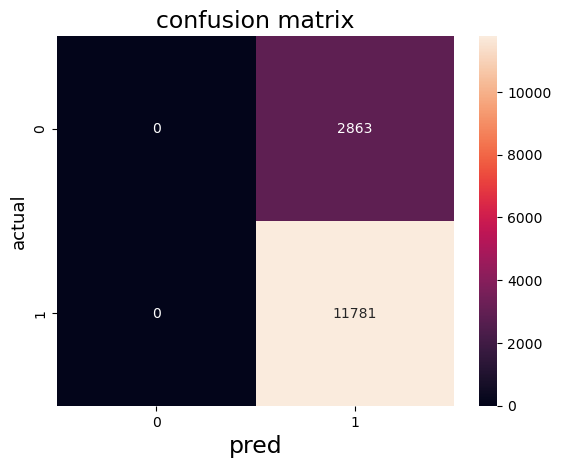

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=['0','1'],yticklabels=['0','1'])
plt.ylabel("actual",fontsize=13)
plt.xlabel("pred",fontsize=17)
plt.title('confusion matrix',fontsize=17)
plt.show()

In [42]:
# Intercept   and  Coefficients: 
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
print('Intercept: \n', logistic_regression.intercept_)
print('Coefficients: \n', logistic_regression.coef_)


Intercept: 
 [0.69402083]
Coefficients: 
 [[ 0.01614219  0.69189424 -0.0287026  -0.02538183  0.00114085]]


In [43]:
#  logit model summary via  statsmodels.api 

X= sm.add_constant(X)
logit_model = sm.Logit(y, X).fit()
print (logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.496865
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         Recommendation   No. Observations:                97625
Model:                          Logit   Df Residuals:                    97620
Method:                           MLE   Df Model:                            4
Date:                Sun, 26 Nov 2023   Pseudo R-squ.:               4.859e-05
Time:                        18:16:25   Log-Likelihood:                -48506.
converged:                       True   LL-Null:                       -48509.
Covariance Type:            nonrobust   LLR p-value:                    0.3179
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
music           0.0246      0.017      1.478      0.139      -0.008       0.057
talk            1.3841    

 # # b) Unsupervised Machine Learning

In [44]:
# Import required packages
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [45]:
#read data 
kmeans_data = df[['trip_distance','mean_price_depd']]
x = kmeans_data['trip_distance']
y = kmeans_data['mean_price_depd']

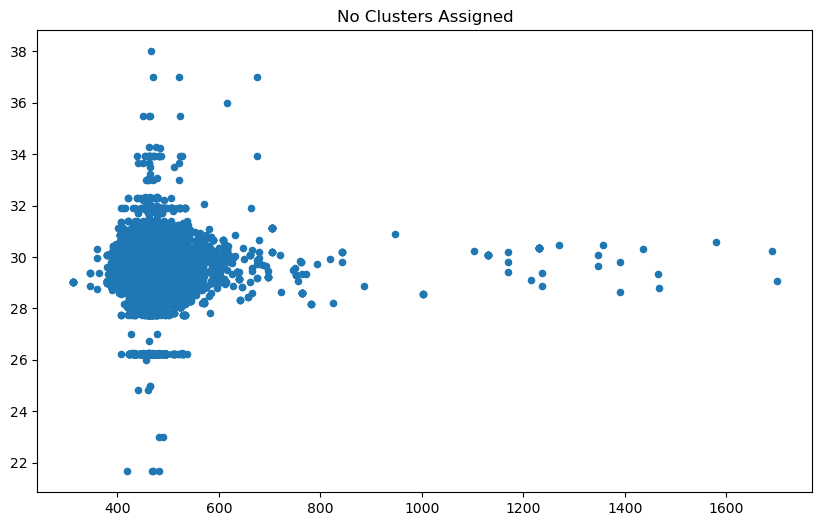

In [46]:
# Plot the random blub data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=20)
plt.title(f"No Clusters Assigned");

In [47]:
kmeans = KMeans(n_clusters=4).fit(kmeans_data)
centroids = kmeans.cluster_centers_

print(centroids)

C:\Users\ahmed.atil\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[ 465.8857774    29.6682372 ]
 [1230.84090909   29.84046277]
 [ 520.41233091   29.79949496]
 [ 439.34807839   29.68813274]]


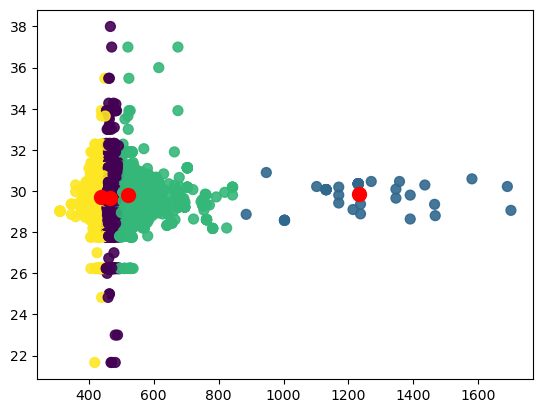

In [48]:
plt.scatter(x, y, c= kmeans.labels_.astype(float), s=50, alpha=0.9)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100)

# Step 5 :  a ) The Elbow Method showing the optimal k

In [49]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(kmeans_data)
    distortions.append(kmeanModel.inertia_)

C:\Users\ahmed.atil\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmed.atil\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmed.atil\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmed.atil\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

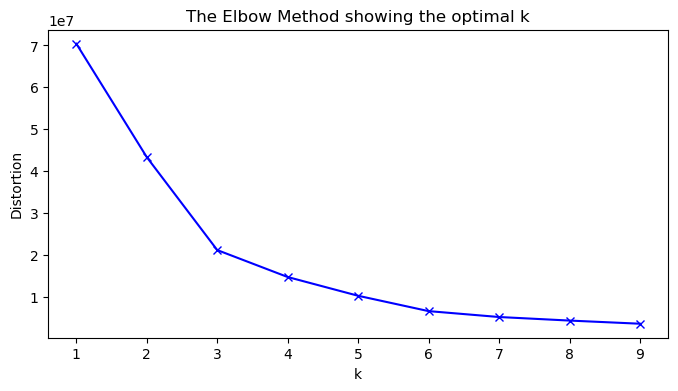

In [50]:
    plt.figure(figsize=(8,4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

# Step 5 : b) The 'Silhouette Method' showing the optimal k


In [51]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.cm as cm

C:\Users\ahmed.atil\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmed.atil\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmed.atil\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ahmed.atil\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The defa

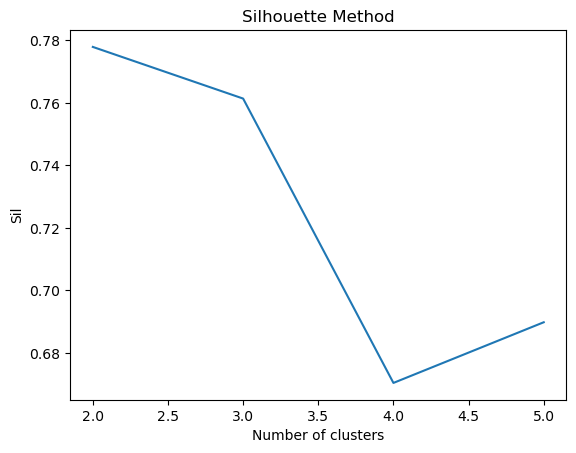

2:0.7778828306737146
3:0.7613619277134338
4:0.6704148946238218
5:0.6898181665146467


In [52]:
from sklearn.metrics import silhouette_score
sil = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters = k).fit(kmeans_data)  
    preds = kmeans.fit_predict(kmeans_data)
    sil.append(silhouette_score(kmeans_data, preds, metric = 'euclidean'))

plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
     print(str(i+2) +":"+ str(sil[i]))

In [58]:
#max(sil)

C:\Users\ahmed.atil\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


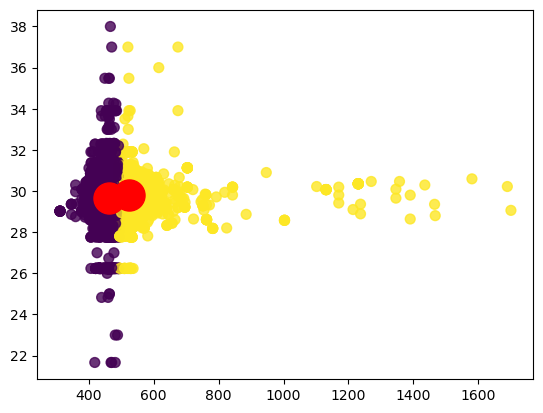

In [61]:
kmeans = KMeans(n_clusters=2).fit(kmeans_data)
centroids = kmeans.cluster_centers_

plt.scatter(x, y, c= kmeans.labels_.astype(int), s=50, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=500);

In [60]:
c= kmeans.labels_.astype(int)
df["Cluster"]  = c +1
df

,driver_id,offer_id,departure,arrival,trip_distance,offer_date,departure_date,price,nb_offers,photo,...,Driver_first_name,Satisfaction_Livel,nb_evaluation,driver_age,driver_gender,Business_Index,Confort_Index,BlaBlaCar_Index,Recommendation,Cluster
0,123956.0,427719.0,Lyon,Paris,425.0,5-Jan-14,1/12/2014 17:30,28.0,526.0,0.0,...,Francois,Excellent,0.0,25.0,0.0,12355.279975,21.0,561.603635,1,1
1,81617.0,280534.0,Lyon,Paris,429.0,2-Jan-14,1/6/2014 14:40,30.0,526.0,0.0,...,Corinne,Good,24.0,31.0,1.0,12381.855057,21.0,562.811594,1,1
2,198167.0,657605.0,Lyon,Paris,429.0,2-Jan-14,1/6/2014 15:10,31.0,526.0,1.0,...,Laura,Excellent,1.0,31.0,1.0,12381.855057,21.0,562.811594,1,1
3,282817.0,946022.0,Lyon,Paris,429.0,2-Jan-14,1/6/2014 15:30,25.0,526.0,1.0,...,Philippe,VeryGood,3.0,31.0,0.0,12381.855057,23.0,515.910627,1,1
4,29640.0,94886.0,Lyon,Paris,435.0,5-Jan-14,1/19/2014 9:00,25.0,526.0,1.0,...,Antoine,VeryGood,10.0,26.0,0.0,12773.689305,7.0,1596.711163,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97620,315770.0,1055947.0,Lyon,Paris,506.0,5-Mar-14,3/14/2014 14:30,28.0,834.0,1.0,...,Solange,Good,2.0,49.0,1.0,15148.761078,20.0,721.369575,1,2
97621,324044.0,1089104.0,Lyon,Paris,506.0,13-Mar-14,3/16/2014 17:45,31.0,834.0,0.0,...,Sylvain,Excellent,15.0,44.0,0.0,14931.587396,7.0,1866.448425,1,2
97622,175981.0,583045.0,Lyon,Paris,514.0,13-Mar-14,5/4/2014 10:05,37.0,834.0,1.0,...,Jerome,Good,5.0,44.0,0.0,15569.916324,21.0,707.723469,1,2
97623,123163.0,423113.0,Lyon,Paris,528.0,13-Mar-14,4/13/2014 16:00,28.0,834.0,0.0,...,Franck,VeryGood,16.0,27.0,0.0,15538.286016,6.0,2219.755145,1,2
